In [1]:
from lib import System
from lib import sys_rand
from lib import sys_waltz
from lib import sim_cpu_v00
from lib import sim_cpu_v01
from lib import sim_cpu_v02
from lib import sim_cpu_v03

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget

import numpy as np

/tmp/ipykernel_2189454/3227630441.py:37: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, frames=None, interval=int(DELTA * 1000), blit=True)


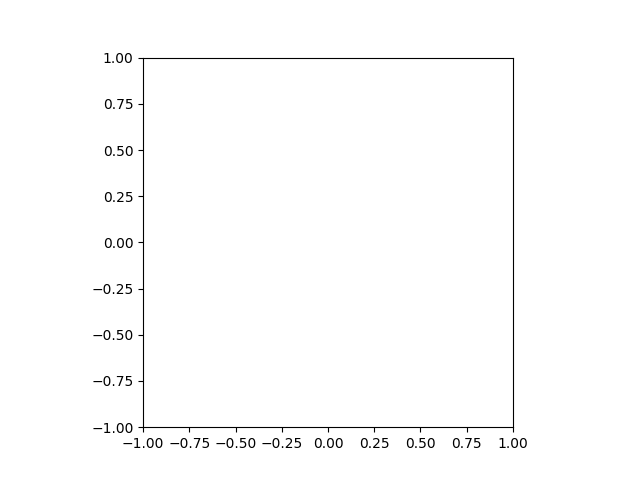

In [2]:
NUM_BODIES = 100
NUM_DIMS = 2
MASS_MIN = 1e6
MASS_MAX = 1e6
POSITION_MIN = -1.0
POSITION_MAX =  1.0
VELOCITY_MIN =  0
VELOCITY_MAX =  0
DELTA = 1e-2
NUM_ITERATIONS = 1000

sys = sys_rand(NUM_BODIES, MASS_MIN, MASS_MAX, POSITION_MIN, POSITION_MAX, VELOCITY_MIN, VELOCITY_MAX)
buf = System(NUM_BODIES, sys.m.copy(), sys.s.copy(), sys.v.copy(), sys.a.copy())

fig, ax = plt.subplots()

points, = ax.plot([], [], 'o')

ax.set_xlim(POSITION_MIN, POSITION_MAX)
ax.set_ylim(POSITION_MIN, POSITION_MAX)

frame_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def update(frame):
    global sys, buf
    sim_cpu_v02(sys, buf, DELTA)
    sys, buf = buf, sys

    x = sys.s[::2]
    y = sys.s[1::2]
    points.set_data(x, y)

    frame_text.set_text(f'Frame: {frame+1}')

    return points, frame_text

ani = FuncAnimation(fig, update, frames=None, interval=int(DELTA * 1000), blit=True)

plt.axis('scaled')
plt.show()

[ 0.          0.33352411  0.         -0.66704822]


/tmp/ipykernel_2218534/2179429646.py:34: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, frames=None, interval=int(DELTA * 1000), blit=True)


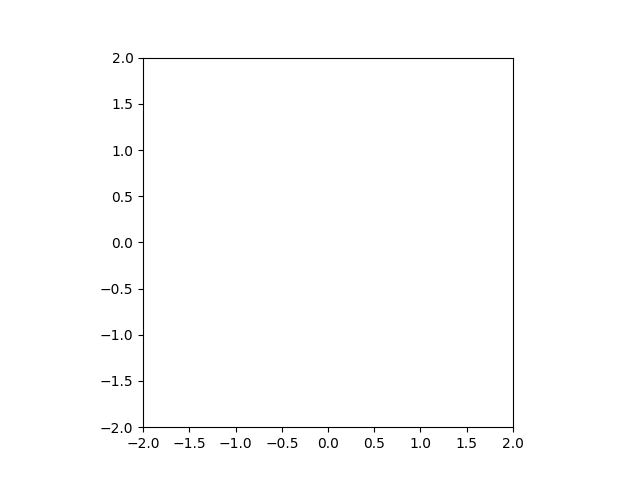

In [2]:
MASS_0 = 1e10
MASS_1 = 5e9
DISTANCE = 1.0
DELTA = 1e-2
NUM_ITERATIONS = 1000

sys = sys_waltz(MASS_0, MASS_1, DISTANCE)
buf = System(2, sys.m.copy(), sys.s.copy(), sys.v.copy(), sys.a.copy())

print(sys.v)

fig, ax = plt.subplots()

points, = ax.plot([], [], 'o')

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

frame_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def update(frame):
    global sys, buf
    sim_cpu_v02(sys, buf, DELTA)
    sys, buf = buf, sys

    x = sys.s[::2]
    y = sys.s[1::2]
    points.set_data(x, y)

    frame_text.set_text(f'Frame: {frame+1}')

    return points, frame_text

ani = FuncAnimation(fig, update, frames=None, interval=int(DELTA * 1000), blit=True)

plt.axis('scaled')
plt.show()